<a href="https://colab.research.google.com/github/LuellaS/testRepo/blob/main/PracaDomowa1_134617.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pakiety

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Przykład z punktami w trójkątcie


In [ ]:
# zwraca punk w trójkącie (c=1) lub poza nim (c=0)
# koniunkcja trzech warunków

def punkt_tr(): 
    x1=random.random()
    x2=random.random()
    if (1.2-x1-x2>0) and (-0.2+x1>0) and (-0.2+x2)>0: 
        c=1
    else:
        c=0
    return np.array([x1,x2,c])

# `Przygotowanie danych`

In [ ]:
probka_tr=np.array([punkt_tr() for i in range(7000)])
print(probka_tr.shape)

(7000, 3)


# Definiuję funkcję rysującą dane

In [ ]:
def draw_result(X,y):
  plt.figure(figsize=(5,5))
  plt.title("Trójkąt",fontsize=16) 
  plt.xlim(min(X[:,0]),max(X[:,0]))
  plt.ylim(min(X[:,0]),max(X[:,0]))
  plt.scatter(X[:,0],X[:,1],c=y,
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=min(y), vmax=max(y)))
  #plt.plot(lin[0],lin[1])

  plt.xlabel('$x_1$',fontsize=18)
  plt.ylabel('$x_2$',fontsize=18); 


# Przygotowanie formatu danych

Shapes of datasets X_train, X_test, y_train, y_test:  (3500, 2) (3500, 2) (3500,) (3500,)


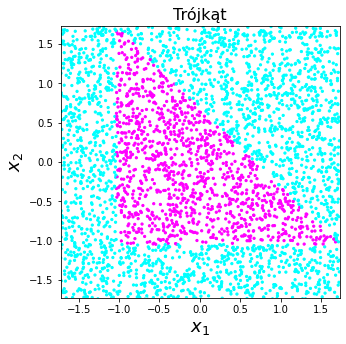

In [ ]:

X, y = probka_tr[:,:2], probka_tr[:,2]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

print("Shapes of datasets X_train, X_test, y_train, y_test: ",X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#narysuj dane testowe
draw_result(X_test, y_test)

# **Trening** 

Instrukcja użycia Multi Layer Perceptron
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [ ]:

clf = MLPClassifier(hidden_layer_sizes=(10,10), activation='tanh', alpha=0.1, 
                    learning_rate_init=0.02, early_stopping=True,validation_fraction=0.2,verbose=True,n_iter_no_change=100,max_iter=1000)
                     


print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = 0.56951831
Validation score: 0.728571
Iteration 2, loss = 0.46938841
Validation score: 0.855714
Iteration 3, loss = 0.34350403
Validation score: 0.945714
Iteration 4, loss = 0.24417531
Validation score: 0.937143
Iteration 5, loss = 0.19732697
Validation score: 0.962857
Iteration 6, loss = 0.15626500
Validation score: 0.967143
Iteration 7, loss = 0.13645092
Validation score: 0.962857
Iteration 8, loss = 0.13067891
Validation score: 0.974286
Iteration 9, loss = 0.11766717
Validation score: 0.965714
Iteration 10, loss = 0.11055692
Validation score: 0.971429
Iteration 11, loss = 0.10681360
Validation score: 0.974286
Iteration 12, loss = 0.10049987
Validation score: 0.971429
Iteration 13, loss = 0.10060939
Validation score: 0.975714
Iteration 14, loss = 0.09781308
Validation score: 0.981429
Iteration 15, loss = 0.09323056
Validation score: 0.971429
Iteration 16, loss = 0.09108917
Validation score: 0.977143
Iteration 17, loss = 0.09078707
Validation score: 0.975714
Iterat

# Plot training andvalidation loss

[0.7285714285714285, 0.8557142857142858, 0.9457142857142857, 0.9371428571428572, 0.9628571428571429, 0.9671428571428572, 0.9628571428571429, 0.9742857142857143, 0.9657142857142857, 0.9714285714285714, 0.9742857142857143, 0.9714285714285714, 0.9757142857142858, 0.9814285714285714, 0.9714285714285714, 0.9771428571428571, 0.9757142857142858, 0.9742857142857143, 0.9571428571428572, 0.9742857142857143, 0.9785714285714285, 0.9757142857142858, 0.9842857142857143, 0.9771428571428571, 0.98, 0.9771428571428571, 0.9828571428571429, 0.9771428571428571, 0.9842857142857143, 0.9842857142857143, 0.97, 0.9842857142857143, 0.9842857142857143, 0.9785714285714285, 0.9842857142857143, 0.98, 0.9714285714285714, 0.9842857142857143, 0.9842857142857143, 0.9842857142857143, 0.9771428571428571, 0.9757142857142858, 0.9828571428571429, 0.9828571428571429, 0.9785714285714285, 0.9771428571428571, 0.9814285714285714, 0.98, 0.9814285714285714, 0.9828571428571429, 0.9857142857142858, 0.9828571428571429, 0.9828571428571

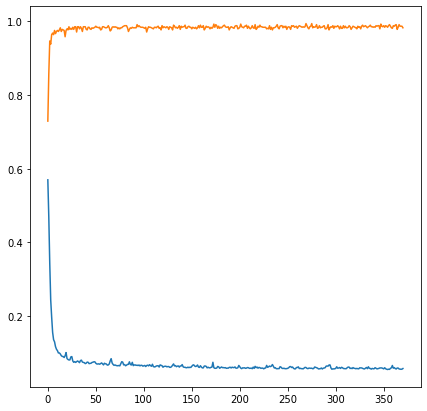

In [ ]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

#Narysuj dane testowe z prawdopodobieństwem przewidywanym przez sieć neuronową

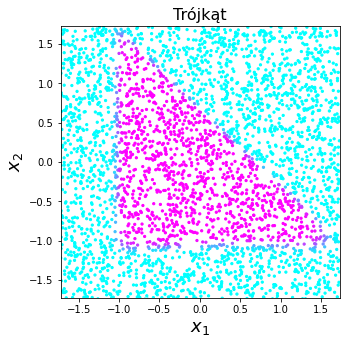

In [ ]:
draw_result(X_test, Z)

# **Krzywa ROC**

<Figure size 504x504 with 0 Axes>

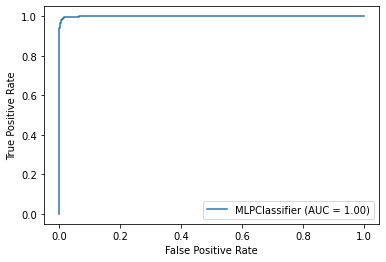

Area Under Curve AUC =  0.9994681016103224
Area Under Curve AUC =  0.9994681016103224


In [ ]:
from sklearn.metrics import plot_roc_curve, auc, roc_curve, roc_auc_score

fig=plt.figure(figsize=(7,7))

roc_disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

#Print AUC
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print("Area Under Curve AUC = ",roc_auc)

#simpler method
print("Area Under Curve AUC = ",roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

# Visualize NN

--2020-11-23 09:09:41--  https://raw.githubusercontent.com/jzliu-100/visualize-neural-network/master/VisualizeNN.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9495 (9.3K) [text/plain]
Saving to: ‘VisualizeNN.py.1’

VisualizeNN.py.1    100%[===================>]   9.27K  --.-KB/s    in 0s      

2020-11-23 09:09:41 (66.5 MB/s) - ‘VisualizeNN.py.1’ saved [9495/9495]



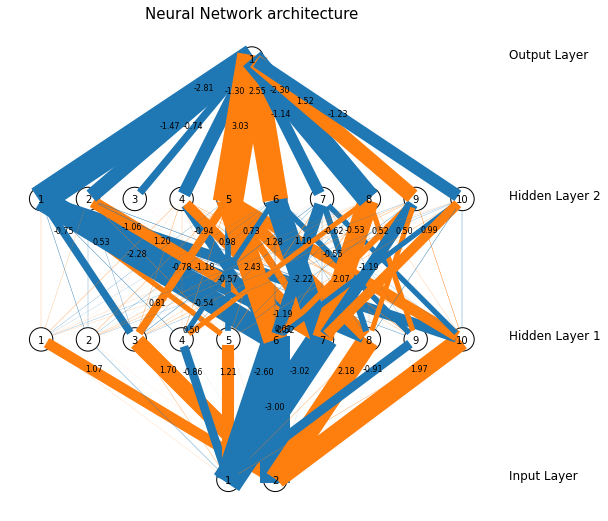

In [ ]:
! wget https://raw.githubusercontent.com/jzliu-100/visualize-neural-network/master/VisualizeNN.py

import VisualizeNN as VisNN
'''
print(clf.hidden_layer_sizes[0])
print(clf.n_outputs_)
print(clf.coefs_[0].shape)
print(clf.coefs_[1].shape)
print(clf.coefs_[2].shape)
'''

NN = list(clf.hidden_layer_sizes)
NN.append(clf.n_outputs_)
NN.insert(0,clf.coefs_[0].shape[0])
network=VisNN.DrawNN(NN,clf.coefs_)
network.draw()

# To samo z użyciem drzew decyzyjnych BDT

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Drzewo decyzyjne
#clf = DecisionTreeClassifier(max_depth=5)

# Wzmocnione drzewo decyzyjne BDT
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200)


print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

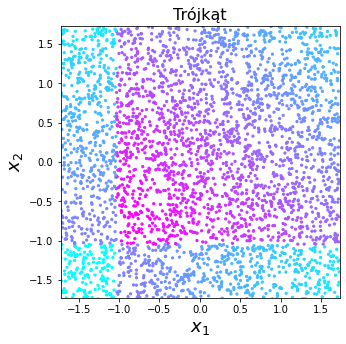

In [ ]:
draw_result(X_test,Z)